## Generating Bingo Cards for the PeopleTeam @ Locaria

### Description: 
A Bingo card is a NxN grid, commonly with N=5, in which it contains NxN - 1 available grids, given that the center grid is always free. The goal of the game is to fill in all the grids except the center one, in a random order. The game is played by calling out numbers, and the player marks the number on their card if it is present. The first player to fill in all the grids except the center one wins the game.

### Variations: 
There are going to be two variations: 
1. Classical Bingo - with numbers from 1 to 101. 
2. Textual Bingo - with words from a list of words.

### Rules:
1. The game is played by calling out numbers, and the player marks the number on their card if it is present.
2. The first player to fill in all the grids except the center one wins the game.
3. The game is played by calling out words, and the player marks the word on their card if it is present.
4. The first player to fill in all the grids except the center one wins the game.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import tempfile

In [15]:
TOTAL_TO_GENERATE = 106 

In [16]:
## read excel and extract the column that contains text 
from typing import List 
def read_excel(file:str) -> List[str]:
    df = pd.read_excel(file,header=None)
    return df[0].tolist()

In [17]:
## read the bingo promps 
bingo_prompts = pd.read_csv("bingo_prompts.csv", header=None).rename(columns = {0:"prompts"})
## capitalize the first letter of each prompt
bingo_prompts["prompts"] = bingo_prompts["prompts"].str.capitalize()
## create a list of prompts
prompts_list = bingo_prompts["prompts"].tolist()
## print the number of prompts 
print(f"There are {len(prompts_list)} prompts")
## show the min, max, and mean length of the prompts
print(f"The min length of the prompts is {bingo_prompts['prompts'].str.len().min()}")
print(f"The max length of the prompts is {bingo_prompts['prompts'].str.len().max()}")
print(f"The mean length of the prompts is {bingo_prompts['prompts'].str.len().mean()}")

There are 54 prompts
The min length of the prompts is 9
The max length of the prompts is 42
The mean length of the prompts is 21.925925925925927


In [18]:
## split them by whitespace
bingo_prompts["prompts_2"] = bingo_prompts["prompts"].str.split()
## get the length of each list of prompts 
bingo_prompts["prompts_2_len"] = bingo_prompts["prompts_2"].str.len()
## show the min, max, and mean length of the prompts
print(f"The min length of the prompts is {bingo_prompts['prompts_2_len'].min()}")
print(f"The max length of the prompts is {bingo_prompts['prompts_2_len'].max()}")
print(f"The mean length of the prompts is {bingo_prompts['prompts_2_len'].mean()}")


The min length of the prompts is 2
The max length of the prompts is 8
The mean length of the prompts is 4.388888888888889


In [19]:
PARAMETERS = {
    "W": 5, 
    "H":5,
    "MIN_VALUE":1,
    "MAX_VALUE":101,
    "MULTIPLIER":2,
    "FREE_SPACE":True,
    "FREE_SPACE_VALUE":"FREE",
    "ADD_RANDOM_COLORS":False,
}

COLORS = {
    "Purple":"#871882",
    "Aqua":"#17DDBF",
    "Tangerine":"#FF8850",
    "Lime":"#CCE161"
}

SETUP_PARAMETERS = {
    "TOTAL_NUMBERS" : (PARAMETERS['W'] * PARAMETERS['H']) - 1,
    "MIN_VALUE" : PARAMETERS['MIN_VALUE'],
    "MAX_VALUE" : PARAMETERS['MAX_VALUE'],
    "FREE_SLOT_COORD" : (PARAMETERS['W']//2, PARAMETERS['H']//2),
    "FIGURE_SIZE" : (PARAMETERS['W']*PARAMETERS['MULTIPLIER'], PARAMETERS['H']*PARAMETERS['MULTIPLIER'])
}

MAX_SIZE = 3

In [23]:
def create_bingo_card():
    ## CREATING THE FIGURE 
    fig = plt.figure(figsize=SETUP_PARAMETERS["FIGURE_SIZE"])
    ax = fig.add_subplot(111)

    ## MAKING THE GRID
    for x in range(PARAMETERS['W']):
        for y in range(PARAMETERS['H']):
            ax.plot([x, x+1], [y, y], color='black')
            ax.plot([x, x], [y, y+1], color='black')
            ax.plot([x+1, x+1], [y, y+1], color='black')
            ax.plot([x, x+1], [y+1, y+1], color='black')
    ax.axis('off')
    return ax


def get_random_color():
    return COLORS[np.random.choice(list(COLORS.keys()))]

def color_free_slot(some_ax,color):
    some_ax.add_patch(plt.Rectangle((SETUP_PARAMETERS["FREE_SLOT_COORD"][0], SETUP_PARAMETERS["FREE_SLOT_COORD"][1]), 1, 1, color=color))

def text_free_slot(some_ax, text):
    some_ax.text(SETUP_PARAMETERS["FREE_SLOT_COORD"][0]+0.5, SETUP_PARAMETERS["FREE_SLOT_COORD"][1]+0.5, text, horizontalalignment='center', verticalalignment='center', fontsize=20)
    return some_ax


def get_random_numbers():
    numbers = np.random.choice(np.arange(PARAMETERS['MIN_VALUE'],PARAMETERS['MAX_VALUE']), size=SETUP_PARAMETERS['TOTAL_NUMBERS'], replace=False)
    np.random.shuffle(numbers)
    return numbers

def fill_grid(some_ax,numbers_list):
    ## FILLING THE GRID
    numbers = numbers_list
    for x in range(PARAMETERS['W']):
        for y in range(PARAMETERS['H']):
            if (x, y) != SETUP_PARAMETERS["FREE_SLOT_COORD"]:
                ## choose a random number from the list numbers and remove it from the list
                number = numbers[0]
                ## make sure that the same color is not used twice in adjacent cells
                ## if the text is longer than 4 words, but less than 6 words, split it into two lines and make the font smaller
                if len(str(number).split()) > MAX_SIZE and len(str(number).split()) <= MAX_SIZE*2:
                    ## join the text with a newline between the words 
                    txt = " ".join(str(number).split()[:MAX_SIZE]) + "\n" + " ".join(str(number).split()[MAX_SIZE:])
                ## if it is greater than 6 words, split it into three lines and make the font even smaller
                elif len(str(number).split()) > MAX_SIZE*2:
                    txt = " ".join(str(number).split()[:MAX_SIZE]) + "\n" + " ".join(str(number).split()[MAX_SIZE:MAX_SIZE*2]) + "\n" + " ".join(str(number).split()[MAX_SIZE*2:])
                else:
                    txt = str(number)
                some_ax.text(x+0.5, y+0.5, txt, horizontalalignment='center', verticalalignment='center', fontsize=10)
                numbers = numbers[1:]
    return some_ax

In [24]:
# print("Generating bingo cards...")
# print("Total to generate: {}".format(TOTAL_TO_GENERATE))
# for i in range(1,TOTAL_TO_GENERATE):
#     ## create a directory called bingo_cards if it does not exist
#     if not os.path.exists("bingo_cards"):
#         os.makedirs("bingo_cards")
#     ## each bingo_card is going to be saved in a separate folder called: bingo_cards/card_1, bingo_cards/card_2, etc.
#     if not os.path.exists(f"bingo_cards/card_{i}"):
#         os.makedirs(f"bingo_cards/card_{i}")
    
#     ## create the bingo card 
#     bingo_card = create_bingo_card()

#     ## color the free slot
#     free_slot_color = get_random_color()
#     color_free_slot(bingo_card, free_slot_color)

#     ## add text to the free slot
#     text_ax =text_free_slot(bingo_card, PARAMETERS["FREE_SPACE_VALUE"])

#     ## fill the grid with random numbers
#     numbers = get_random_numbers()
#     filled_ax = fill_grid(bingo_card, numbers)

#     ## Save the configuration of a single bingo card
#     CONFIGURATION = {
#         "W":PARAMETERS['W'],
#         "H":PARAMETERS['H'],
#         "TOTAL_NUMBERS":SETUP_PARAMETERS["TOTAL_NUMBERS"],
#         "MIN_VALUE": PARAMETERS["MIN_VALUE"],
#         "MAX_VALUE": PARAMETERS["MAX_VALUE"],
#         "FREE_SLOT_COORD": SETUP_PARAMETERS["FREE_SLOT_COORD"],
#         "LOCARIA_COLORS": COLORS,
#         "ADD_RANDOM_LOCARIA_COLOR": PARAMETERS['ADD_RANDOM_COLORS'],
#         "MULTIPLIER": PARAMETERS['MULTIPLIER'],
#         "FIGURE_SIZE": SETUP_PARAMETERS["FIGURE_SIZE"],
#         "FREE_SLOT_COLOR":free_slot_color,
#     }
#     ## SHOW THE FIGURE
#     # plt.savefig(f"bingo_cards/card_{i}/bingo_card.png")
#     # plt.close()
#     # with open(f"bingo_cards/card_{i}/configuration.json", "w") as f:
#     #     json.dump(CONFIGURATION, f, indent=4)
#     # print(f"Card {i} generated!")


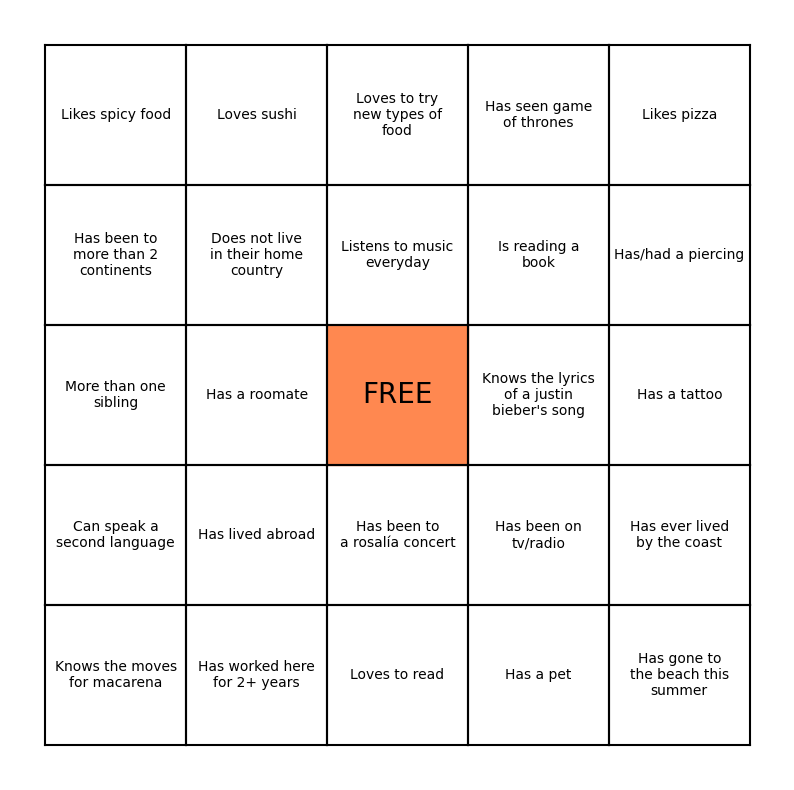

In [25]:
## create the bingo card 
bingo_card = create_bingo_card()

## color the free slot
free_slot_color = get_random_color()
color_free_slot(bingo_card, free_slot_color)

## add text to the free slot
text_ax =text_free_slot(bingo_card, PARAMETERS["FREE_SPACE_VALUE"])

## fill the grid with random numbers
# numbers = get_random_numbers()

filled_ax = fill_grid(bingo_card, prompts_list)

plt.show()

In [ ]:
## use hugging face GPT2 to generate sentences to be able to fill the variation #2 
## https://huggingface.co/transformers/model_doc/gpt2.html
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')

In [ ]:
## set the seed 
set_seed(42)
## generate a sentence
sent = """
1. I am proactive 
2. I am a good listener
3. I am a good communicator
4. 
"""
output = generator(sent, max_length=10, num_return_sequences=1)
print(output[0]['generated_text'])

In [50]:
nprompts_list[0]

['Knows the moves for macarena',
 'Can speak a second language',
 'More than one sibling',
 'Has been to more than 2 continents',
 'Likes spicy food']

In [56]:
## batch the prompts into groups of 5
## https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks

def batch_list(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

## batch the prompts into groups of 5
nprompts_list = list(batch_list(prompts_list, 5))

## generate the sentences
sentences = []
for prompts in nprompts_list:
    ## create a string with the prompts
    sent = ", ".join(x for x in prompts)
    ## generate a sentence
    output = generator(sent, max_length=45, num_return_sequences=1)
    ## append the generated sentence to the list
    sentences.append(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [57]:
## print all the sentences
for sentence in sentences:
    print(sentence)

Knows the moves for macarena, Can speak a second language, More than one sibling, Has been to more than 2 continents, Likes spicy food and has an amazing voice All time in the top 10 in the sport
Has worked here for 2+ years, Has lived abroad, Has a roomate, Does not live in their home country, Loves sushi, and is very active at reddit.com/r/askedish.

Loves to read, Has been to a rosalía concert, Listens to music everyday, Loves to try new types of food, Has a pet. She loves cats like us and we're just going to look
Has been on tv/radio, Knows the lyrics of a justin bieber's song, Is reading a book, Has seen game of thrones, Has gone to the beach this summer, Knows the world
Has ever lived by the coast, Has a tattoo, Has/had a piercing, Likes pizza, Is alergic to something, Wants to eat a cheese, Was a swimmer for the Olympics, Has a history of
Has tried scuba-diving, Has tried snorkeling, Has tried hiking, Does sport, Has visited at least 3 museums including the National Museum of Am